In [25]:
import os, csv
import torch
import pandas as pd
import numpy as np
import time
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
for root, dirs, files in os.walk('.'):
    for item in dirs:
        if (item[0]!='.'):
            try:
                os.remove(os.path.join(item,'.DS_Store'))
            except:
                pass

In [22]:
folders = os.listdir('extracted_images')
with open('msb.csv', mode='w') as msb:
    msb_writer = csv.writer(msb, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    msb_writer.writerow(['Filename', 'Class Label'])
    i = -1
    for subfolder in folders:
        i += 1
        subfolder_here = os.listdir(os.path.join('extracted_images',subfolder))
        for image in subfolder_here:
            msb_writer.writerow([image,str(i)])

In [23]:
f6 = open('msb.csv', encoding="utf-8")
reader6 = list(csv.reader(f6))
f6.close()

In [24]:
reader6

[['Filename', 'Class Label'],
 ['exp13834.jpg', '0'],
 ['exp76060.jpg', '0'],
 ['exp15289.jpg', '0'],
 ['exp70363.jpg', '0'],
 ['exp8694.jpg', '0'],
 ['beta_21836.jpg', '0'],
 ['exp51434.jpg', '0'],
 ['exp68712.jpg', '0'],
 ['exp22155.jpg', '0'],
 ['exp9005.jpg', '0'],
 ['exp43226.jpg', '0'],
 ['exp18236.jpg', '0'],
 ['exp11212.jpg', '0'],
 ['beta_10625.jpg', '0'],
 ['exp23288.jpg', '0'],
 ['exp14424.jpg', '0'],
 ['exp23465.jpg', '0'],
 ['exp66139.jpg', '0'],
 ['exp69578.jpg', '0'],
 ['exp21266.jpg', '0'],
 ['exp23471.jpg', '0'],
 ['beta_72671.jpg', '0'],
 ['beta_26208.jpg', '0'],
 ['exp9165.jpg', '0'],
 ['exp58955.jpg', '0'],
 ['exp49119.jpg', '0'],
 ['beta_17758.jpg', '0'],
 ['exp9830.jpg', '0'],
 ['beta_47621.jpg', '0'],
 ['exp16421.jpg', '0'],
 ['exp14544.jpg', '0'],
 ['exp10044.jpg', '0'],
 ['exp71647.jpg', '0'],
 ['exp69752.jpg', '0'],
 ['exp23883.jpg', '0'],
 ['exp86595.jpg', '0'],
 ['exp69746.jpg', '0'],
 ['beta_26778.jpg', '0'],
 ['exp10508.jpg', '0'],
 ['exp74924.jpg', '0'],


extracted_images/tan/exp10215.jpg


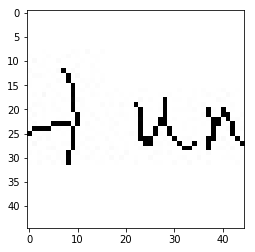

extracted_images/tan/exp10300.jpg


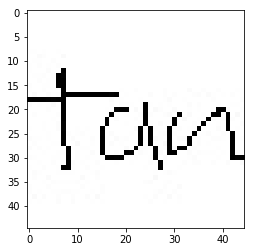

In [29]:
import glob
image_paths = sorted(glob.glob('extracted_images/tan/*.jpg'))
for i in (12, 25):
    im_path = image_paths[i]
    print(im_path)
    im = Image.open(im_path)
    plt.imshow(im)
    plt.show()

In [30]:
class QuickdrawDataset(Dataset):
    """Custom Dataset for loading Quickdraw images"""

    def __init__(self, csv_path, img_dir, transform=None):
    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['Filename'].values
        self.y = df['Class Label'].values
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir,
                                      self.img_names[index]))
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return self.y.shape[0]